In [1]:
print("HELLO WORLD!")

HELLO WORLD!


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
tr = pd.read_csv('train.csv')
# seeing the head of our code

tr.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#to organize our data so as to apply logistical reasoning to it we must get it in 0/1 or true/false style

In [12]:
tr.isnull().sum() #will return ture if the value is false

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#to look at it more pictographically we can see its heat map

<AxesSubplot:>

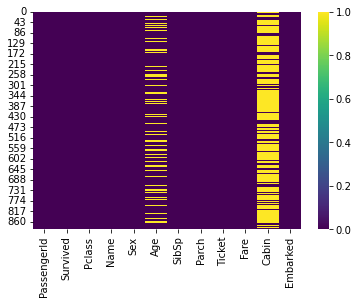

In [14]:
sns.heatmap(tr.isnull(),cmap='viridis')

In [15]:
# as we can see only 2 of them have null values those are cabin and sex. Moreover since cabin has so many null values we might as well drop it


In [16]:
# in case of age the ambiguity is much lesser
#with the help of chart graph lets see if age has a significant effect

<AxesSubplot:xlabel='Survived', ylabel='count'>

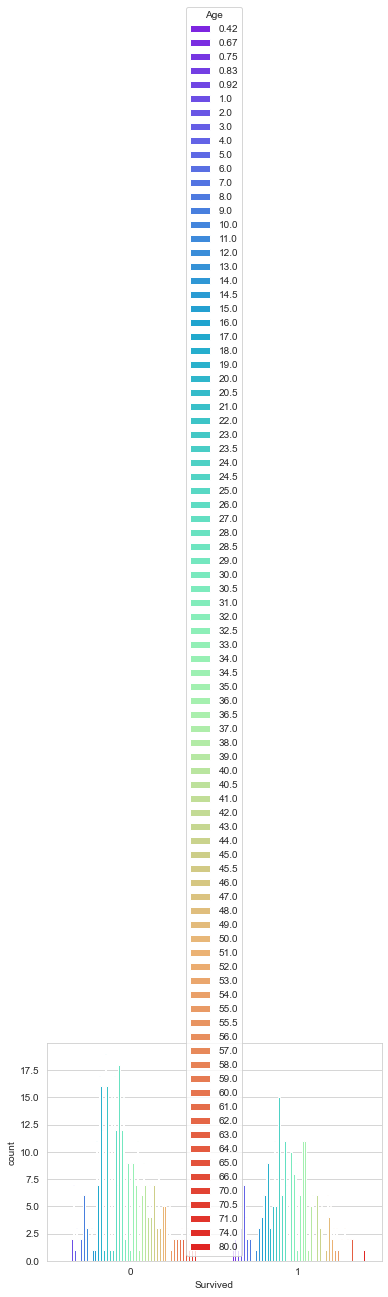

In [17]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived' , hue = 'Age', data = tr ,palette= 'rainbow')

In [18]:
# as seen from the graph the variation of data with respect to age is quite significant and thus cannot be dropped instead the null values will later be replaced by average values

In [19]:
#EDA on class and SibSp:

<AxesSubplot:xlabel='Survived', ylabel='count'>

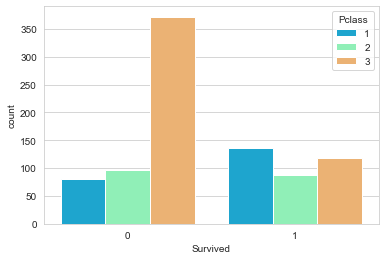

In [20]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived' , hue = 'Pclass', data = tr ,palette= 'rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

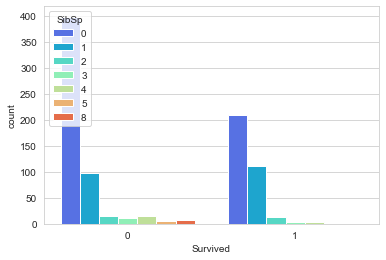

In [21]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived' , hue = 'SibSp', data = tr ,palette= 'rainbow')

<AxesSubplot:>

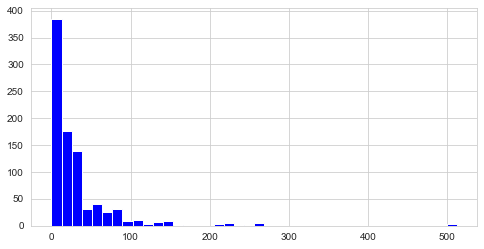

In [22]:
tr['Fare'].hist(color='blue' ,bins=40,figsize=(8,4))

In [23]:
#since majority of people have a similar fare and also it cannot be represented in binary form it should be dropped

In [24]:
#same goes with name, passanger id, ticket. 

In [25]:
#dropping cabin, name, passenger id, ticket

In [26]:
tr.drop('Cabin',axis=1,inplace=True)
tr.drop('Name',axis=1,inplace=True)
tr.drop('Ticket',axis=1,inplace=True)
tr.drop('Fare',axis=1,inplace=True)
tr.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [27]:
#for embarked and sex we need to convert them in binary

In [28]:
tr.dropna(inplace=True)
pd.get_dummies(tr['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [29]:
gender = pd.get_dummies(tr['Embarked'],drop_first=True)
yo = pd.get_dummies(tr['Sex'],drop_first=True)

In [30]:
tr = pd.concat([tr,gender,yo],axis=1)

In [31]:
tr.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Q,S,male
0,1,0,3,male,22.0,1,0,S,0,1,1
1,2,1,1,female,38.0,1,0,C,0,0,0
2,3,1,3,female,26.0,0,0,S,0,1,0
3,4,1,1,female,35.0,1,0,S,0,1,0
4,5,0,3,male,35.0,0,0,S,0,1,1


In [32]:
#now the only unattended criteria left is age

In [33]:
#to replace the age we can have multiple criteria like based on gender, Pclass, yo

In [34]:
#Looking of plots of each we can get different averages of age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

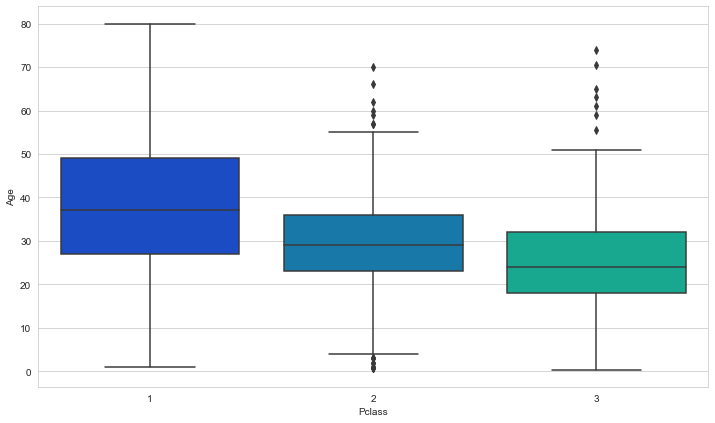

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=tr,palette='winter')

<AxesSubplot:xlabel='male', ylabel='Age'>

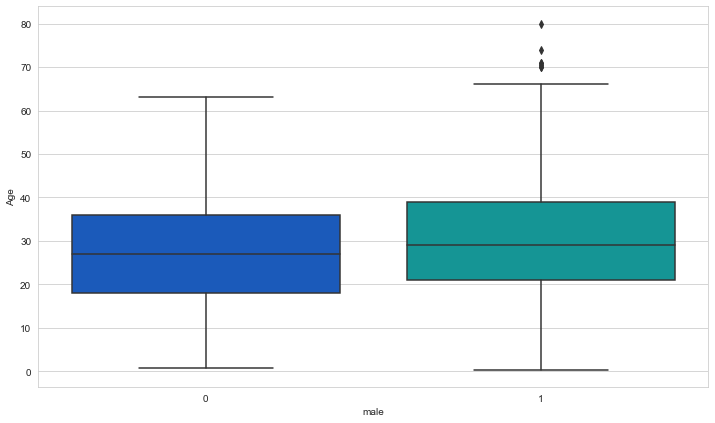

In [36]:
plt.figure(figsize=(12,7))
sns.boxplot(x='male', y='Age', data=tr,palette='winter')

<AxesSubplot:xlabel='S', ylabel='Age'>

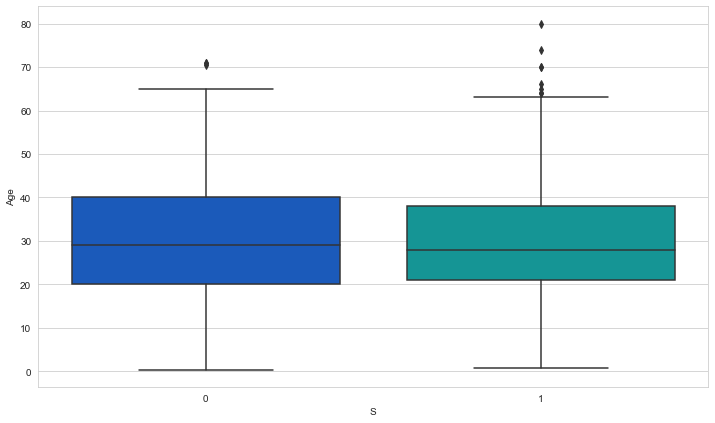

In [37]:
plt.figure(figsize=(12,7))
sns.boxplot(x='S', y='Age', data=tr,palette='winter')

In [38]:
#the maximum variation is when we divided according to the class in rest cases the variation of Pclass so now we have apt values to replace in place of our Null Values

In [39]:
def ok(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age
    
        

<AxesSubplot:>

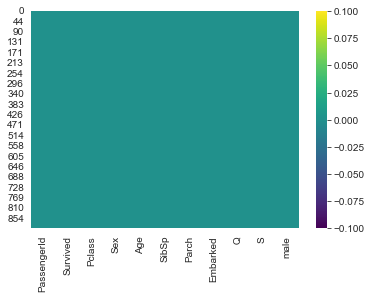

In [40]:
sns.heatmap(tr.isnull(),cmap='viridis')

In [41]:
#the blank heat map indicates that we have eliminated the null values and thus can move forward towards regression

In [42]:
tr.drop('Sex',axis=1,inplace=True)
tr.drop('Embarked',axis=1,inplace=True)
tr.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Q,S,male
0,1,0,3,22.0,1,0,0,1,1
1,2,1,1,38.0,1,0,0,0,0
2,3,1,3,26.0,0,0,0,1,0
3,4,1,1,35.0,1,0,0,1,0
4,5,0,3,35.0,0,0,0,1,1


In [43]:
tr.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Q,S,male
0,1,3,22.0,1,0,0,1,1
1,2,1,38.0,1,0,0,0,0
2,3,3,26.0,0,0,0,1,0
3,4,1,35.0,1,0,0,1,0
4,5,3,35.0,0,0,0,1,1


In [45]:
tr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Q,S,male
0,1,0,3,22.0,1,0,0,1,1
1,2,1,1,38.0,1,0,0,0,0
2,3,1,3,26.0,0,0,0,1,0
3,4,1,1,35.0,1,0,0,1,0
4,5,0,3,35.0,0,0,0,1,1


In [46]:
col = ["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Q", "S", "male"]
X=tr[col]
y=tr["Survived"]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_val, y_train, y_val = train_test_split( X,y, test_size = 0.2, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\kotha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()